# 🚗 Project Title: Indian Car Resale Price Estimator
## Predicting Used Car Prices in Indian Metro Cities


🧠 Project Objective
The objective of this project is to develop a machine learning model that accurately predicts the resale price of used cars in major Indian metro cities. The prediction is based on various car features such as brand, model, variant, fuel type, transmission, ownership details, kilometers driven, quality score, and other relevant attributes. This model aims to assist buyers, sellers, and dealerships in making informed pricing decisions.

### About the Dataset
📊 Dataset Overview
Dataset Name: Indian IT Cities Used Car Dataset 2023
This dataset provides a rich set of features collected from used car listings across India’s major metro regions, particularly cities with strong IT presence. It captures both technical specifications and seller-level information.

🔍 Key Features in the Dataset:
Vehicle Details: Company, Model, Variant, Fuel Type, Body Style, Color

Condition Indicators: Kilometers Driven, Ownership History, Transmission Type, CNG Kit Availability, Quality Score

Pricing & Date Info: Listed Price, Year of Manufacture, Model Year

Seller Information: Dealer Name, Dealer Location, Warranty Info

The dataset is well-suited for supervised machine learning tasks like regression and can be enhanced through feature engineering to improve model performance.



### Data Dictionary
| Column Name | Description |
| --- | --- |
|ID|Unique ID for each listing|
|Company|Name of the car manufacturer|
|Model|Name of the car model|
|Variant|Name of the car variant|
|Fuel Type|Fuel type of the car|
|Color|Color of the car|
|Killometer|Number of kilometers driven by the car|
|Body Style|Body style of the car|
|Transmission Type|Transmission type of the car|
|Manufacture Date|Manufacture date of the car|
|Model Year|Model year of the car|
|CngKit|Whether the car has a CNG kit or not|
|Price|Price of the car|
|Owner Type|Number of previous owners of the car|
|Dealer State|State in which the car is being sold|
|Dealer Name|Name of the dealer selling the car|
|City|City in which the car is being sold|
|Warranty|Warranty offered by the dealer|
|Quality Score|Quality score of the car|

In [ ]:
#Installing the seaborn

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the dataset
df = pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Data Preprocessing Part 1

In [8]:
#Shape of the dataset(to check the shape of the dataset)
df.shape

(1064, 19)

In [9]:
#colums in the dataset (to check what all columns are there in the dataset)
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [11]:
#to check the column name, datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [12]:
#To check the statitsics of the dataset
df.describe()

,Id,Kilometer,ModelYear,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,568156.542293,52807.187970,2016.864662,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,0.439538,0.719717
min,525978.000000,101.000000,2003.000000,0.000000,0.000000
25%,555321.500000,32113.500000,2015.000000,0.000000,7.500000
50%,572753.000000,49432.000000,2017.000000,1.000000,7.800000
75%,583072.750000,68828.500000,2019.000000,1.000000,8.100000
max,589122.000000,640000.000000,2023.000000,1.000000,9.400000


In [13]:
df.describe(include='all')

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
count,1064.000000,1064,1064,1064,1063,1064,1064.000000,1064,350,1064,1064.000000,22,1064,1064,1064,1064,1064,1064.000000,1064.000000
unique,NaN,23,218,575,5,76,NaN,10,9,162,NaN,2,367,4,10,57,11,NaN,NaN
top,NaN,MARUTI SUZUKI,CITY,VXI,PETROL,White,NaN,HATCHBACK,Manual,2018-01-01,NaN,Company Fitted,6.25 Lakhs,1st Owner,Delhi,Car Choice Exclusif,Delhi,NaN,NaN
freq,NaN,252,38,37,670,289,NaN,423,269,25,NaN,14,22,897,196,67,196,NaN,NaN
mean,568156.542293,NaN,NaN,NaN,NaN,NaN,52807.187970,NaN,NaN,NaN,2016.864662,NaN,NaN,NaN,NaN,NaN,NaN,0.738722,7.770207
std,16438.139974,NaN,NaN,NaN,NaN,NaN,33840.296979,NaN,NaN,NaN,2.996786,NaN,NaN,NaN,NaN,NaN,NaN,0.439538,0.719717
min,525978.000000,NaN,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,555321.500000,NaN,NaN,NaN,NaN,NaN,32113.500000,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.500000
50%,572753.000000,NaN,NaN,NaN,NaN,NaN,49432.000000,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.800000
75%,583072.750000,NaN,NaN,NaN,NaN,NaN,68828.500000,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.100000


In [15]:
#Check for null Values 
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [17]:
#Check for Duplicated rows (This will return the total number of duplicate rows in the entire dataset.)
df.duplicated().sum()

0

In [19]:
#View the Duplicated rows (This displays the actual duplicate rows for my  inspect)
df[df.duplicated()]

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore


In [27]:
#dropping column ID, as it is a identifier and not required for analysis
df.drop('Id',axis=1,inplace=True)

KeyError: "['Id'] not found in axis"

In [25]:
print(df.columns.tolist())

['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear', 'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City', 'Warranty', 'QualityScore']


In [ ]:
### dropping column ID silently to ignore warnings and error, as it is a identifier and not required for analysis

In [26]:
df.drop(columns=['Id'], inplace=True, errors='ignore')

In [28]:
#Column Data Types
df.dtypes

Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object

### Type casting Price column to float
Explanation:
amount_str: is a string like '6.5 Lakhs' or '65,000'.

🧾 If it contains "Lakhs":

float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000

Removes the word " Lakhs" and commas.

Converts the remaining string (like '6.5') to a float.

Multiplies by 100000 to convert lakhs to rupees.

✅ Example: '6.5 Lakhs' → 6.5 * 100000 → 650000.0


 If it doesn't contain "Lakhs":

float(amount_str.replace(',', ''))

Just removes commas and converts to float.

✅ Example: '65,000' → '65000' → 65000.0

🧪 Final Step:

df['Price'] = df['Price'].apply(convert_amount)



In [29]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [30]:
df['Price'].dtype

dtype('float64')

In [31]:
df['Price'].head(10)

0    575000.0
1    435000.0
2    470000.0
3    990000.0
4    270000.0
5    999000.0
6    675000.0
7    600000.0
8    480000.0
9    240000.0
Name: Price, dtype: float64

In [32]:
#Checking for null values percentage wise
df.isnull().sum()/df.shape[0]*100

Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

Here in the dataset, three columns have missing values - FuelType, TransmissionType and CngKit. I will be removing the CngKit column becuase in majority of the cars don't run on CNG and the CNG cars can be easily identified from the FuelType column. So we will replace the null values with 'No' in CngKit column. In case of the TransmissionType, 67% data is missing, so we can't include this column in our analysis. In case of the FuelType, we will drop the rows with null values.

<Axes: xlabel='Price'>

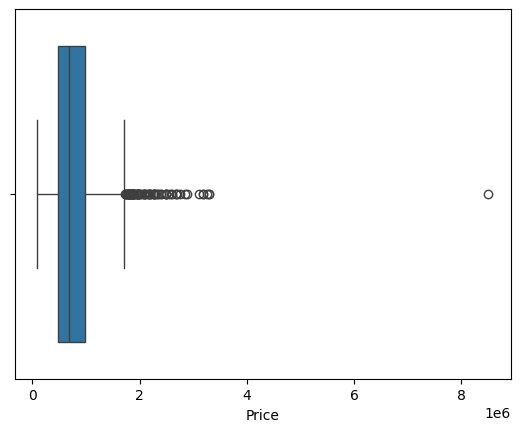

In [35]:
#Check for the Outliers
import seaborn as sns
sns.boxplot(x=df['Price'])

In [38]:
#Using IQR (Interquartile Range) Method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Number of outliers in Price:", outliers.shape[0])

Number of outliers in Price: 85


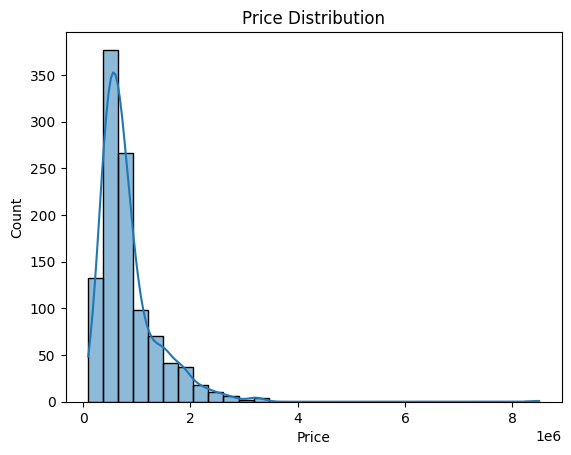

In [37]:
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

In [40]:
#inspect a few outliers

In [39]:
df.sort_values('Price', ascending=False).head(10)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
568,HONDA,CITY(2017-2020),V PETROL,PETROL,Silver,52898,SEDAN,NaN,2018-08-01,2018,NaN,8500000.0,1st Owner,Haryana,Taneja Fourwheels,Gurgaon,0,8.0
382,TOYOTA,FORTUNER,2.8 4WD AT,DIESEL,White,114000,SUV,NaN,2019-02-01,2019,NaN,3300000.0,1st Owner,Delhi,Car Choice Exclusif,Delhi,0,7.4
752,TOYOTA,FORTUNER,SIGMA 4,DIESEL,Grey,17341,SUV,NaN,2017-01-01,2017,NaN,3295000.0,1st Owner,Uttar Pradesh,Noida Car Ghar,Noida,1,7.6
329,FORD,ENDEAVOUR,3.2L DIESEL TITANIUM+ 4X4 AT,DIESEL,Silver,57036,SUV,NaN,2019-06-01,2019,NaN,3250000.0,1st Owner,Delhi,Car Choice Exclusif,Delhi,1,7.7
1021,MERCEDES BENZ,ML CLASS,250 CDI,DIESEL,Blue,114736,Sedan,Automatic,2015-12-01,2015,NaN,3190000.0,1st Owner,Rajasthan,Car Estate,Jaipur,0,6.7
746,TOYOTA,FORTUNER,2.7 2WD AT,DIESEL,Black,67863,SUV,NaN,2018-07-01,2018,NaN,3175000.0,1st Owner,Uttar Pradesh,Noida Car Ghar,Noida,1,7.7
375,FORD,ENDEAVOUR(2016_2019),TITANIUM 2.2 4X2 AT,DIESEL,White,16337,SUV,NaN,2018-06-01,2018,NaN,3100000.0,1st Owner,Delhi,Carz Villa,Delhi,1,8.3
317,TOYOTA,FORTUNER,2.8 2WD AT,DIESEL,Metallic Silver,72907,SUV,NaN,2017-07-01,2017,NaN,2875000.0,1st Owner,Delhi,Carz Villa,Delhi,1,7.6
421,MERCEDES BENZ,CLA CLASS,200 CDI SPORT,DIESEL,Dark Blue,13504,SEDAN,NaN,2019-06-01,2019,NaN,2850000.0,1st Owner,Delhi,Guru Kripa Motors,Delhi,1,8.3
441,TOYOTA,FORTUNER,2.8 2WD MT,DIESEL,White,43621,SUV,NaN,2018-12-01,2018,NaN,2750000.0,1st Owner,Delhi,Car Choice Exclusif,Delhi,1,8.0


In [44]:
#Dropping the CngKit column(Dropping this columns because it have 67% null value)
df.drop('CngKit', axis=1, inplace=True, errors='ignore')

In [46]:
#Dropping TransmissionType column(Dropping this columns because it have 97% of null value)
df.drop('TransmissionType',axis=1,inplace=True, errors='ignore')

In [47]:
#Removing null values from FuelType column
df['FuelType'].dropna(inplace=True)

Dropping the ManufacturerDate column since it represents the car's age, which is already captured by the ModelYear column.

In [48]:
df.drop('ManufactureDate', axis = 1, inplace=True)

#### drop Variant to reduce complexity and noise, especially if it’s not adding meaningful predictive power or causes many unique categories.

In [52]:
df.drop('Variant', axis = 1, inplace=True, errors='ignore')

Changing the model year column to car age column

In [53]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [54]:
for i in df.columns:
    print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


### Descriptive Statistics

In [57]:
df.describe()  #So far we remove Id, FuelType, CNGKit, tranasmissiontype, rename model year to car age by logic, dropped manufacture date and as well as variant also

,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,6.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,4.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,8.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


In [58]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,5,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,2,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,8,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,3,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,13,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [59]:
df.tail()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
1059,HYUNDAI,ELITE I20(2020-2020),PETROL,White,42918,HATCHBACK,3,715000.0,1st Owner,Rajasthan,K.S. Motors,Jaipur,1,8.3
1060,HYUNDAI,XCENT(2017-2020),PETROL,White,78910,SEDAN,4,500000.0,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.8
1061,MAHINDRA,SCORPIO(2009-2014),DIESEL,White,76000,SUV,10,575000.0,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,6.8
1062,MARUTI SUZUKI,VITARA BREZZA,DIESEL,Silver,80120,HATCHBACK,5,771000.0,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.4
1063,HONDA,CITY,DIESEL,Urban Titanium,77500,SEDAN,9,499000.0,2nd Owner,Rajasthan,Rajasthan Car World,Jaipur,0,6.8


## Exploratory Data Analysis

In the exploratory data analysis, I will examine the distribution of values across all columns to gain a better understanding of the dataset. Following that, I will analyze the relationships between the target variable and the independent variables.

### Number Of Cars By Company

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\2929482969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')


Text(0.5, 1.0, 'Number of cars by company')

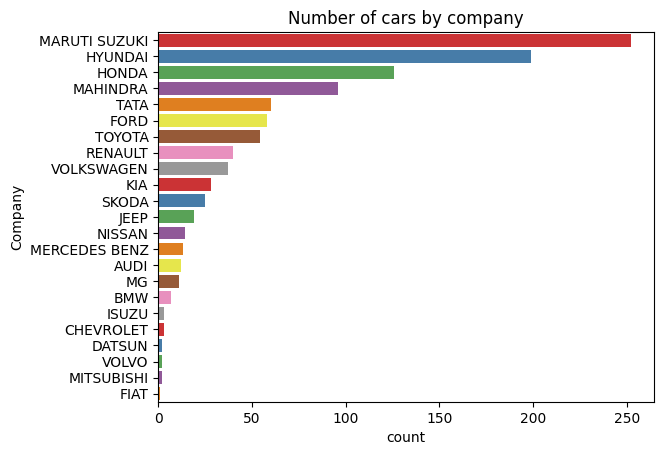

In [62]:
#Number of cars by company
sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')

From this graph, we get know about the distribution of cars in the dataset from different companies.There are total 23 companies in the dataset, out which Maruti Suzuki, Hyundai, Honda, Mahindra and Tata are the top five companies who used cars are for sale. Therefore, we can assume that these company's car are more durable and have a good resale value.

### Top 10 Car Models

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\3123474212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')


Text(0.5, 1.0, 'Top 10 Car Models')

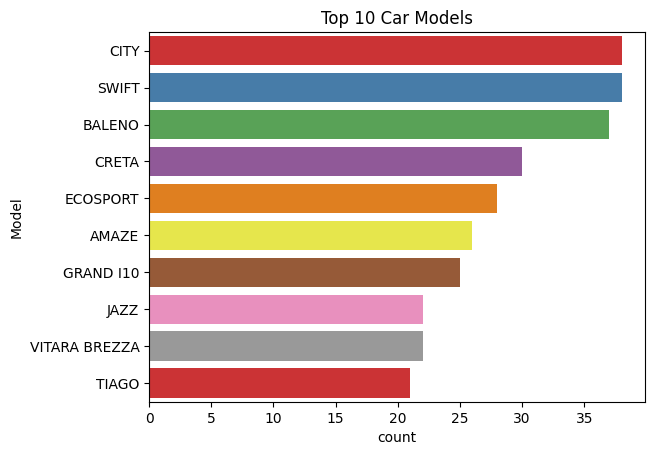

In [63]:
#Top 10 cars models by number
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')

Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we can assume that these car models are more durable and have a good resale value. Moreover, this graph also shows that Honda City and Swift are more in demand in the used car market.

### Car Fuel Type

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\183303738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

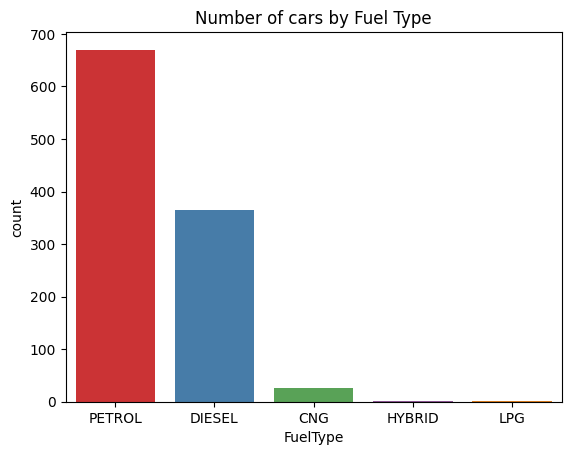

In [64]:
#Cars count by fuel type
sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')

In [66]:
##with data values

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\3784626020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FuelType', data=df, palette='Set1')


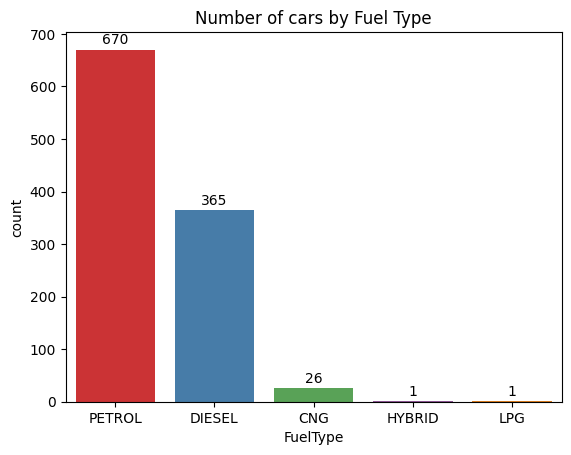

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x='FuelType', data=df, palette='Set1')
ax.set_title('Number of cars by Fuel Type')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5,   # Adjust '5' to move label above the bar
            f'{int(height)}', 
            ha='center', va='bottom')

plt.show()


Majority of cars for resale have a petrol engine which is more than 670 cars, followed by 365 cars with diesel engine. Very few of the cars have CNG engine(26) and negligible number of cars are hybrid(1) or on LPG(1). Thereofore, we can assume that petrol and diesel cars are more in demand in the used car market.

### Top 10 Colors for Cars

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

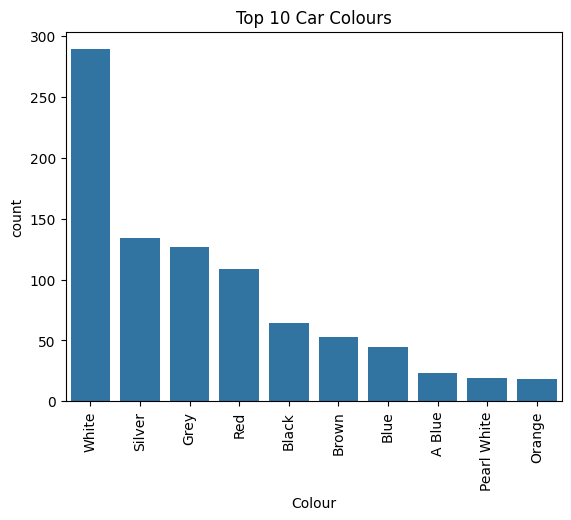

In [67]:
#Top 10 colors of cars
sns.countplot(x = 'Colour', data = df, order = df['Colour'].value_counts().iloc[:10].index).set_title('Top 10 Car Colours')
plt.xticks(rotation = 90)

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\1667531115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Colour',


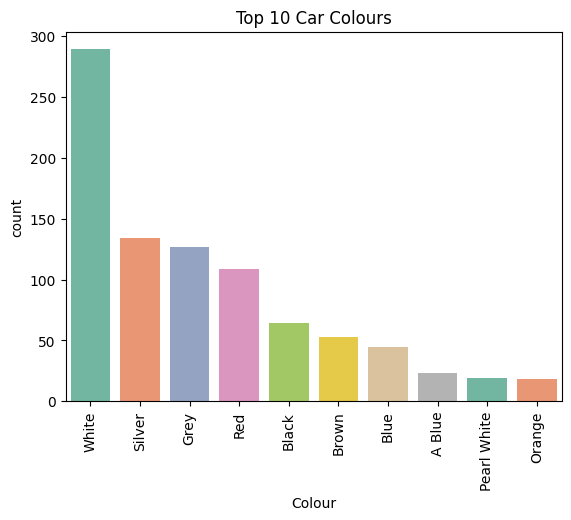

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

top_colors = df['Colour'].value_counts().iloc[:10].index

ax = sns.countplot(x='Colour', 
                   data=df, 
                   order=top_colors, 
                   palette='Set2')  # Changed palette here

ax.set_title('Top 10 Car Colours')
plt.xticks(rotation=90)
plt.show()


Although color of car has no impact on the cars performance, but still it plays a major role in the car demand. From the graph, we can see that white color is the most preferred color for the used cars, followed by silver, grey, red and black. Therefore, we can assume that white, silver, grey, red and black color cars are more in demand in the used car market will have a good resale value.

### Odometre Reading

Text(0.5, 1.0, 'Odometer Reading')

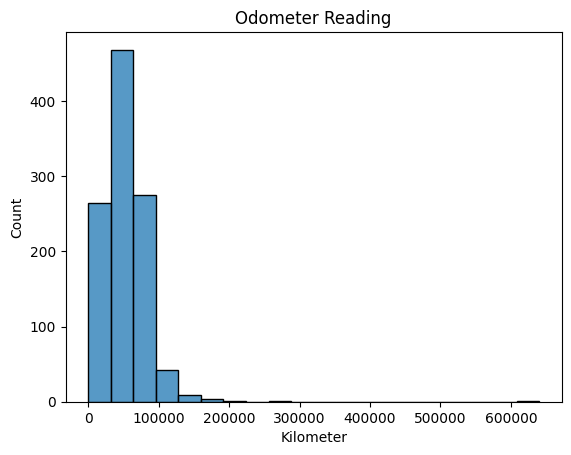

In [69]:
#Odometer reading distribution
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

This graph shows the distribution of the odometer readings of the cars in the dataset. From the graph, we can see that most of the cars have odometer reading less than 100000 km. To be more particular majority of cars are driven for 30000 km to 50000 km. Thefore, we can assume that cars with odometer reading less than 100000 km are more in demand in the used car market will have a good resale value.

### Body Style

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

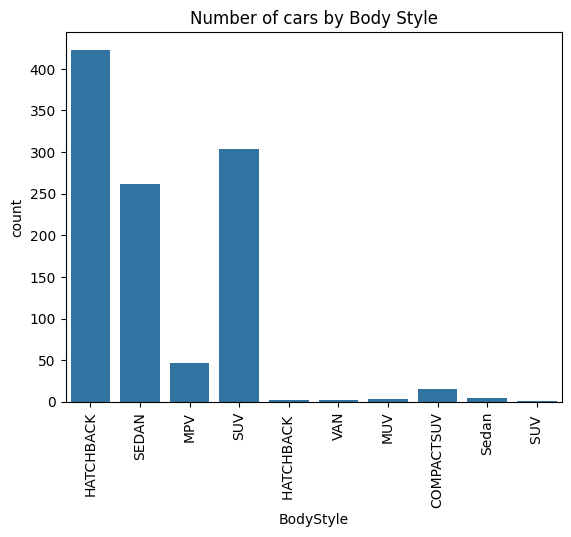

In [71]:
#Body style count
sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

According to this graph, most of the cars have HatchBack, SUV and Sedan body style, which tells us about the market demand of these body styles. Therefore, we can assume that cars with HatchBack, SUV and Sedan body style are more in demand in the used car market will have a good resale value.

### Car Age Distribution

Text(0.5, 1.0, 'Car age distribution')

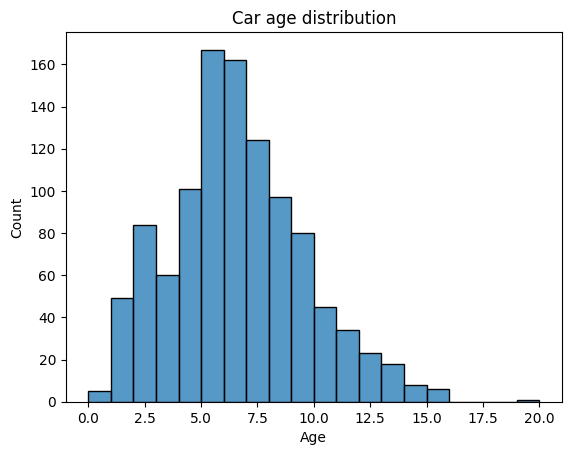

In [72]:
#Car age distribution
sns.histplot(x = 'Age', data = df, bins = 20).set_title('Car age distribution')

Age of the car plays an important role in deciding its resale value. Here, in the dataset cars that age between 5 to 7 years are more in number. Moreover majority of the cars age more than 5 years, which affect their resale value. However, there are still significant number of cars with age less than 5 years, thereofore, I assume they would have higher resale value.

In addition to that, we can see than one car has age near 20 years which could be an outlier.

### Price Distribution

Text(0.5, 1.0, 'Car price distribution')

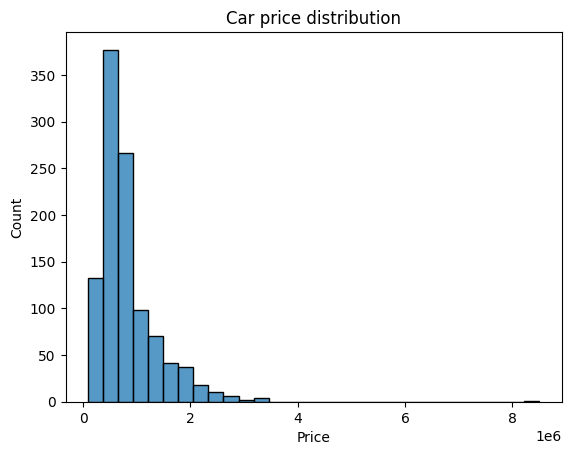

In [73]:
#Price distribution
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

This graph help us to know about the distribution of the car prices in the dataset. In the dataset, most of the cars have price is between 3 to 9 lakhs, with maximum cars between 3 to 6 lakhs. Therefore, we can assume that cars with price between 3 to 9 lakhs are more in demand in the used car market. Moreover there are some cars with resale price more than 20 lakhs, which could be possible for luxury cars or it could be an outlier.

### Location based Distribution

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\196354263.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\196354263.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\196354263.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

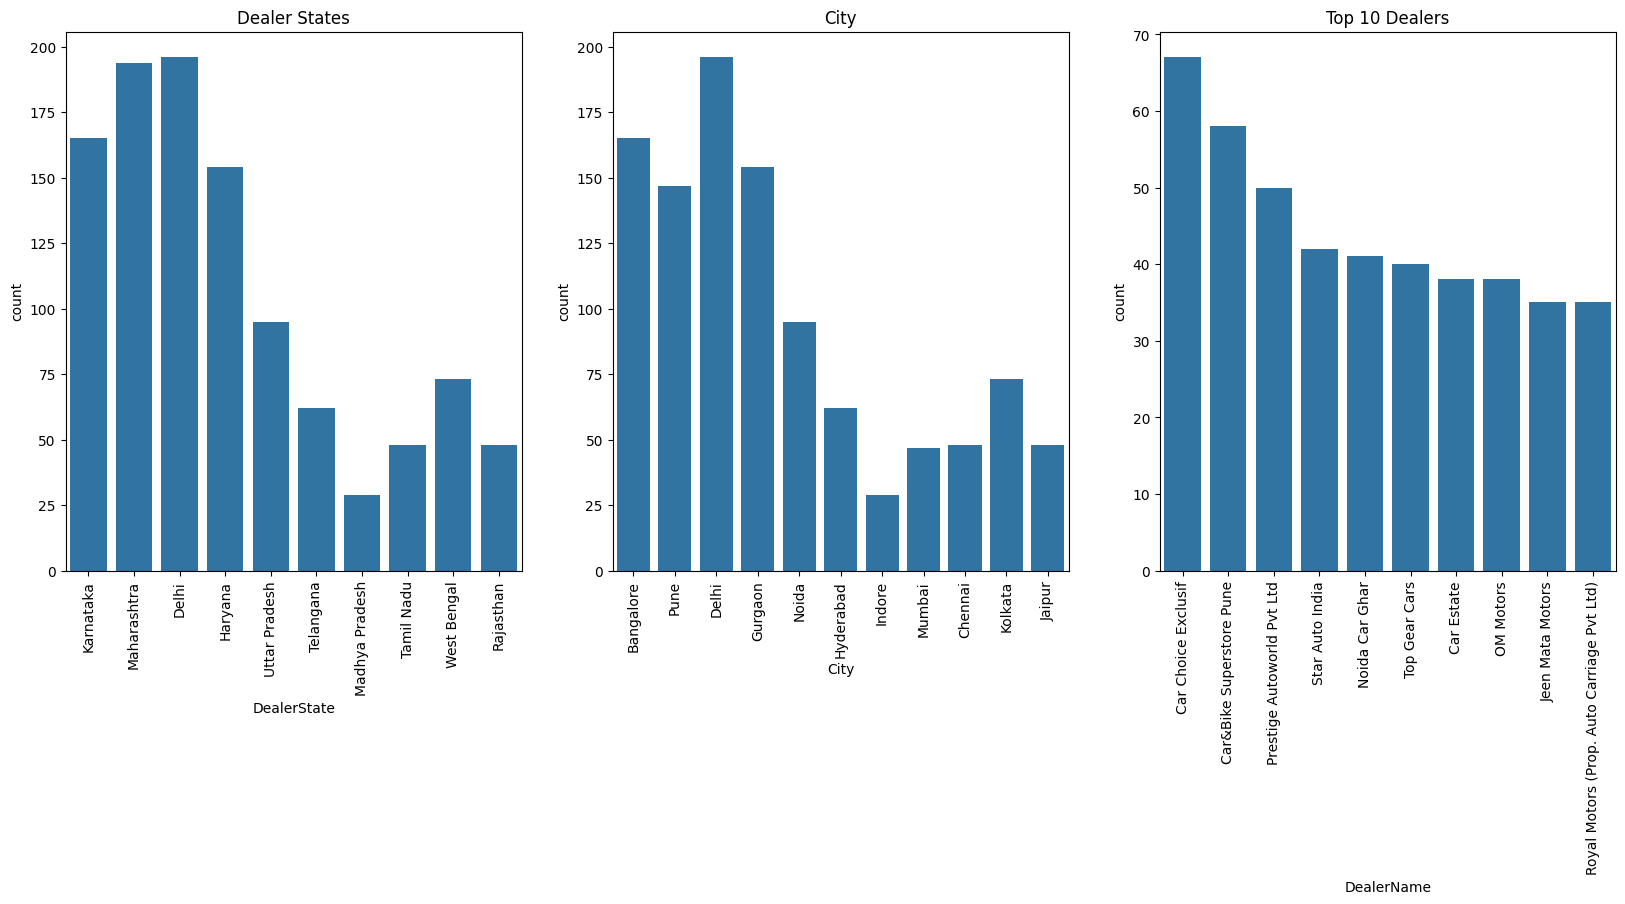

In [74]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

These graphs shows the distribution of cars based on their dealer state, city and Dealer Name. In the dealer state graph, we see that Delhi and Maharashtra have the highest number of used cars for sale followed by Karnataka and Haryana. In the dealer city graph, we see that Delhi has the highest number of cars which is obvious from the the previous graph, however in contrast to the previous graph, Banglore has more used cars for sale than Pune, infact Pune has lower car count than Gurgaon. In the dealer name graph, we see that Car Choice Exclusif, Car&Bike Superstore Pune and Prestige Autoworld Pvt Ltd are moung the top 3 dealers with highest number of used cars for sale.

### Car Owner Type

Text(0.5, 1.0, 'Number of cars by Owner Type')

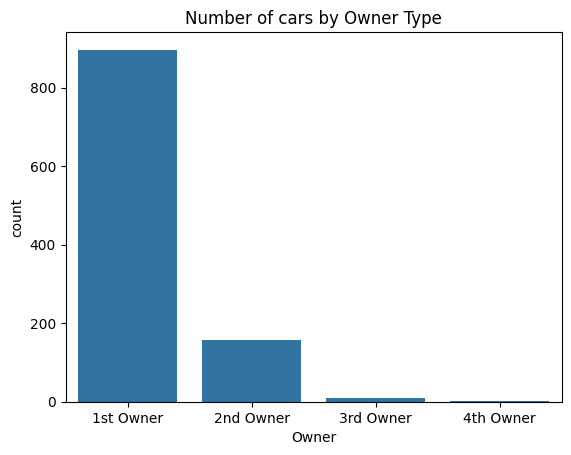

In [75]:
sns.countplot(x = 'Owner', data = df).set_title('Number of cars by Owner Type')

The car owner type has a huge impact on its resale value. Majority of the cars that are been sold are 1at Owner cars followed by 2nd Owner cars which are significantly less in number as compared to 1st Owner. Moreover, the 3rd and 4th owner cars are very less in number. Therefore, we can assume that 1st Owner cars are more preferred in the used car market and have a good resale value.

### Warranty

Text(0.5, 1.0, 'Number of cars by Warranty')

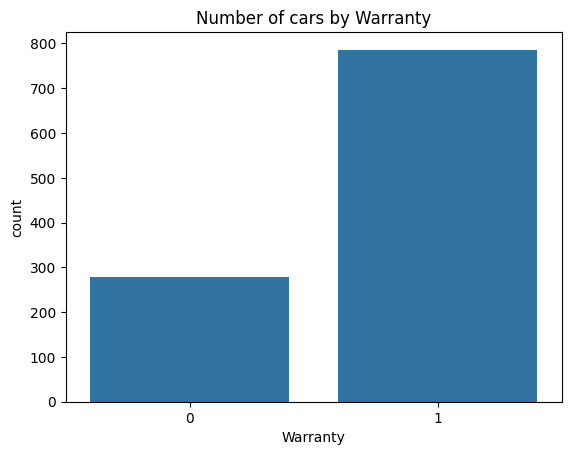

In [76]:
sns.countplot(x = 'Warranty', data = df).set_title('Number of cars by Warranty')

This graphs shows the number of used cars for sale that come with a warranty from the dealership company. The warranty plays a major role and customers prefer to purchase a car with warranty, it has been shown in the dataset as well, where we can see than the number cars with warranty is almost twice the number of cars without warranty.

### Quality Score Distribution

Text(0.5, 1.0, 'Quality Score Distribution')

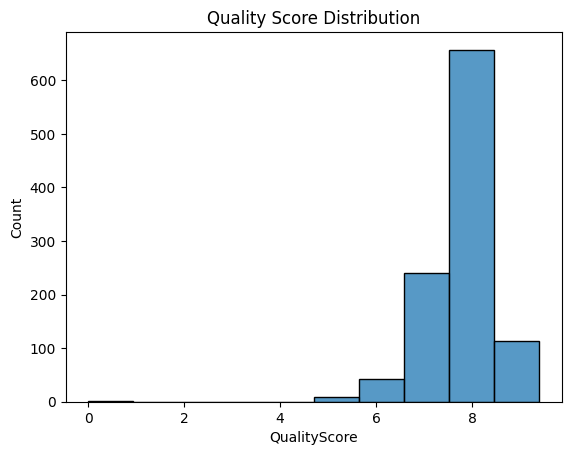

In [77]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('Quality Score Distribution')

Quality score is an important feature which has a huge impact on the car sales and its preference by the customers. Cars with higher quality scores tend to have a much higher resale value and are more preferred by the customers. In the dataset, most of the cars have a decent quality score between 7-8, which highlights that the cars are thoroughly checked before being sold in the used car market. However, there are some cars with quality score less than 5, which could be due to the fact that they are not in good condition or they are very old.

##### Till now, I have visualized the distribution of the data and got a better understanding of the data. Now, I will be looking at the relationship between the Car Price aans the independent variables.

### Top 10 Car Companies by Price

Text(0.5, 1.0, 'Top 10 car Companies by price')

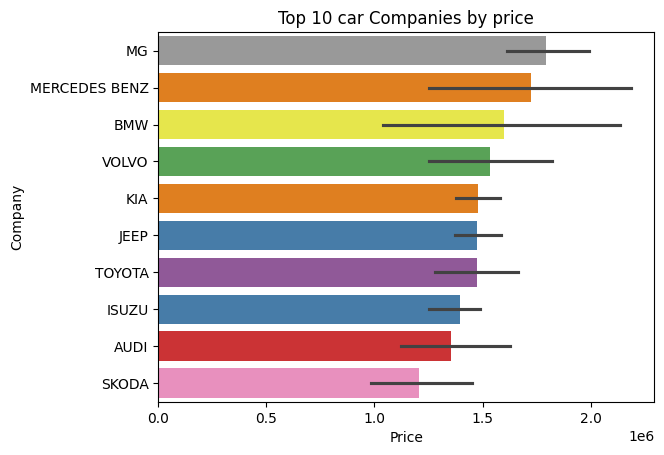

In [78]:
#Top 10 car companies by price
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Company', palette= 'Set1').set_title('Top 10 car Companies by price')

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features. 

Moreover, my prevous hypothesis, about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price

### Top 10 Car Models by Price

Text(0.5, 1.0, 'Top 10 car Models by price')

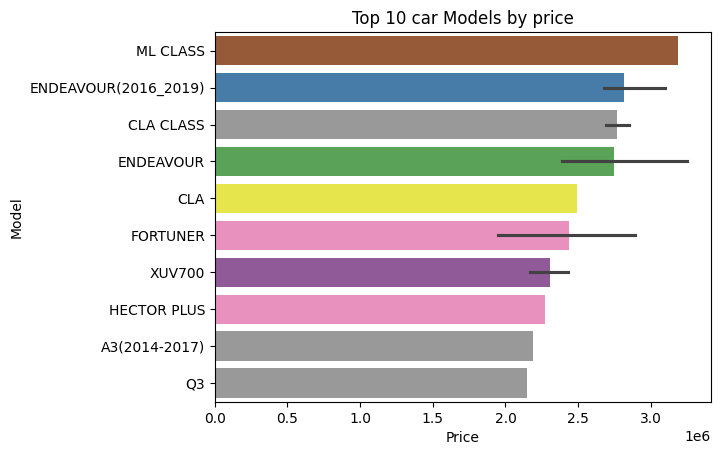

In [80]:
#Top 10 car models by price
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')

This graph shows the relation between the car model and it resale value and we can see that it shows similarity woth the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.

### Car Fuel Type and Price

Text(0.5, 1.0, 'Price by Fuel Type')

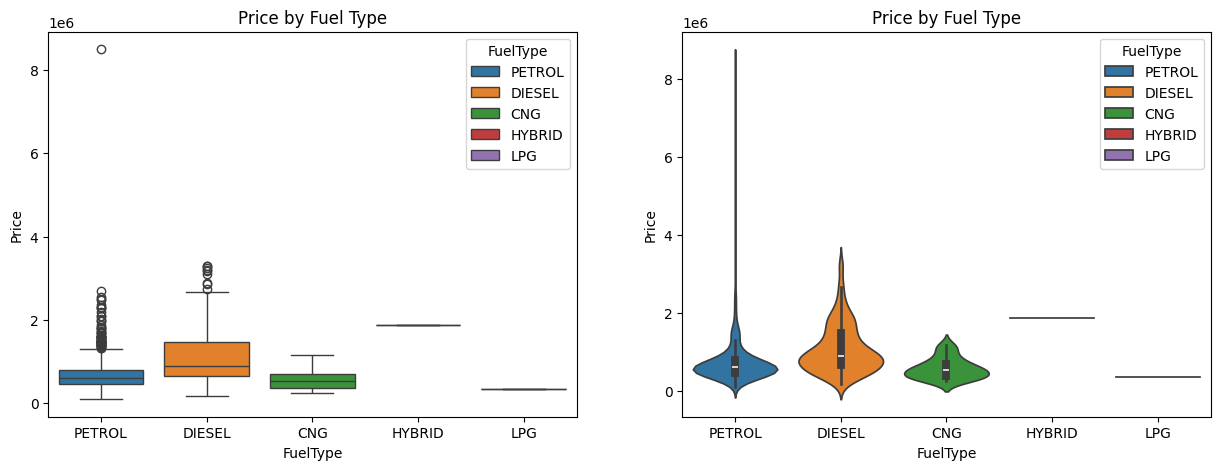

In [81]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')

The above plots visualizes the relationship between the car fuel type and its resale value. In the boxplot we can see than cars with diesel fuel type have higher resale value than petrol and CNG and LPG. In the violin plot, we can see that the distribution of the price for diesel cars is more concentrated between 10 to 20 lakh as compared to Petrol. From this it is cleared that, customers prefer petrol and diesel car than other fuel type and the diesel cars are more in demand in the used car market.

### Top 10 Car Colors by Price

Text(0.5, 1.0, 'Top 10 car Colors by price')

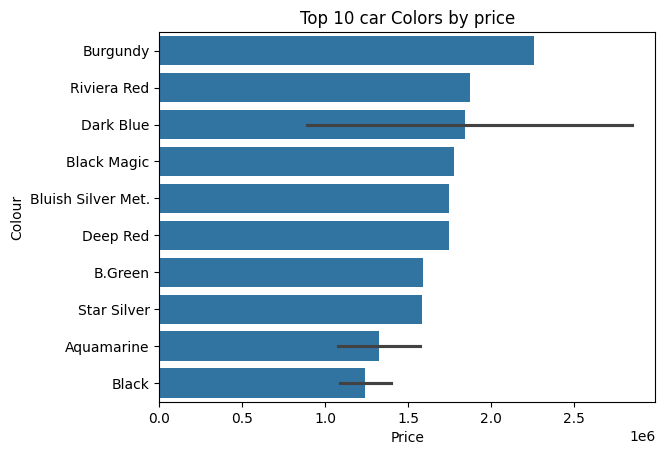

In [82]:
#Top 10 car colors by price
sns.barplot(y = 'Colour', x = 'Price', data = df, order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index).set_title('Top 10 car Colors by price')

The cars with colors like Burgundy, Riviera Red and Dark Blue have higher resale value as compared to other colors. This shows that color of the car does matter and plays a major role in the resale value of the car.

Moreover, we also came to know that exotic colors have more price but they are not in demand in the used car market.

### Odometer Reading and Price

Text(0.5, 1.0, 'Odometer Reading and Price')

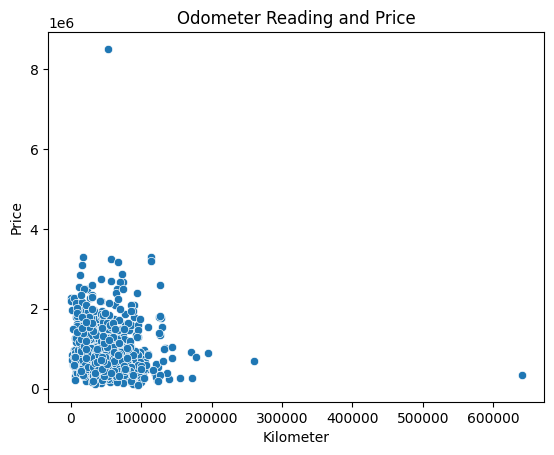

In [83]:
sns.scatterplot(x = 'Kilometer', y = 'Price', data = df).set_title('Odometer Reading and Price')

In the scatter plot we can see than the data is concentrated near the origin, which means that most of the cars have odometer reading less than 100000 km. In addition to that the cars with less odometer reading shows higher resale value and as the odometer reading increases the resale value decreases. Therefore, my hypothesis was correct that cars with odometer reading less than 100000 km are more in demand in the used car market will have a good resale value.

### Body Style and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

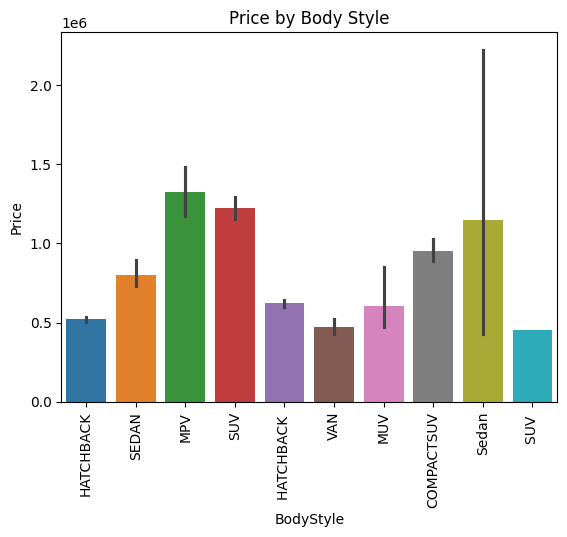

In [84]:
sns.barplot(x = 'BodyStyle', y = 'Price', data = df, hue = 'BodyStyle').set_title('Price by Body Style')
plt.xticks(rotation = 90)

MPV, SUV and Sedan are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the used car market and have a good resale value. This also shows that my assumption was correct however, the Hatchback body style cars despite being in majority have lower resale value.

### Car Age and Price

Text(0.5, 1.0, 'Car age and Price')

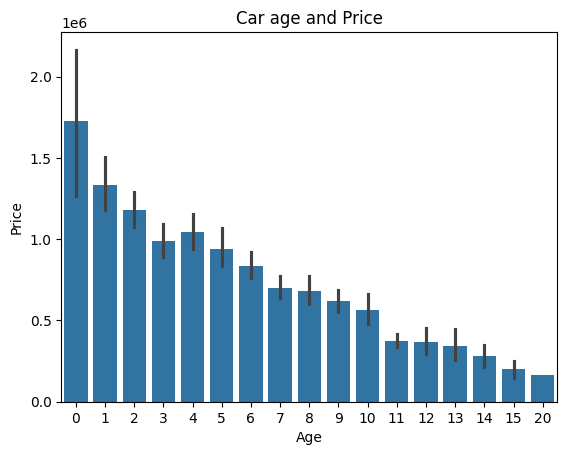

In [85]:
sns.barplot(x = 'Age', y = 'Price', data = df).set_title('Car age and Price')

As we discussed earlier, age is a key determinant for a car's resale value and this graph clearly visulaizes the relation of the age with car price. The cars with age less than a year has then highest price and as the age increases the prices decreases gradually. Therefore, my hypothesis was correct that cars with age less than 5 years have higher resale value.

### Location based Price Distribution

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\7821321.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\7821321.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\Gouthum\AppData\Local\Temp\ipykernel_35016\7821321.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

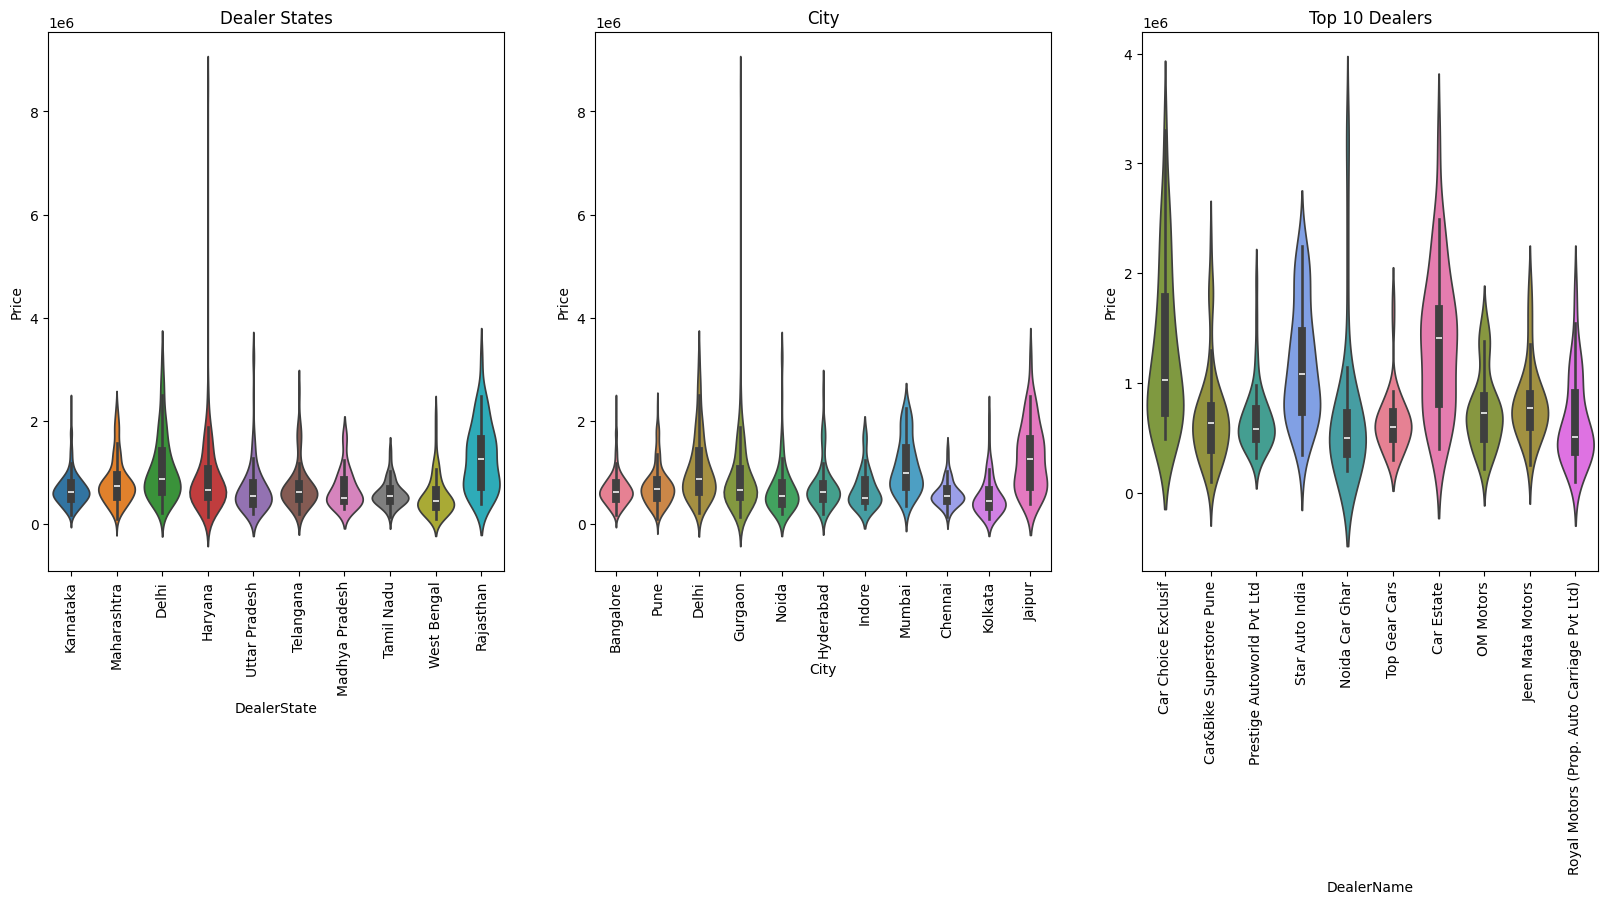

In [86]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In the above graph we can see the price distribution based on the state, city and the dealer name. In the state graph, we can see that the cars in Rajastan have the highest price followed by Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Haryana. In the city graph, we can see that the cars in Jaipur have the highest price followed by Mumbai and Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, we can see the top 10 dealers along with their price distribution. Here, Car Estate has the highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Noida Car Ghar.

### Car Owner Type and Price

Text(0.5, 1.0, 'Price by Owner Type')

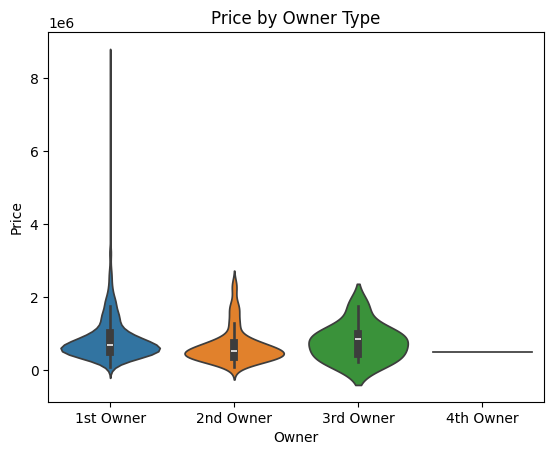

In [87]:
sns.violinplot(x = 'Owner', y = 'Price', data = df, hue = 'Owner').set_title('Price by Owner Type')

The graph shows the price distribution with respect to the car owner type. The cars with 1st owner have the highest price which is obvious as they are new cars. However, the 3rd Owner type cars depite being less in number have higher price than 2nd Owner type cars, which is not obvious. Therefore, we can assume that 3rd Owner type cars having higher price could some luxury or vintage cars.

### Warranty and Price

Text(0.5, 1.0, 'Price by Warranty')

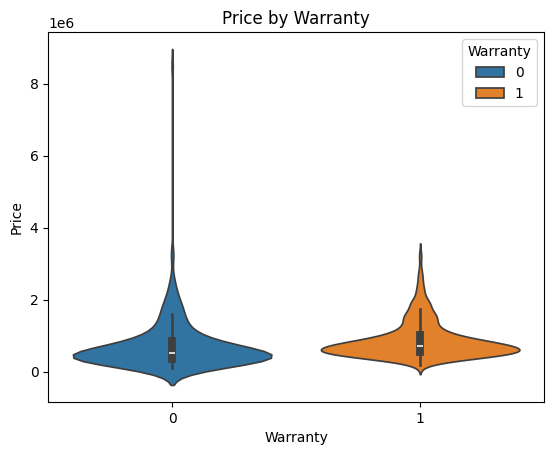

In [88]:
sns.violinplot(x = 'Warranty', y = 'Price', data = df, hue = 'Warranty').set_title('Price by Warranty')

Here, we can see some change in the violinplot of the cars with and without warranty. The cars with warranty tends to have slightly higher price than the cars without warranty. Therefore, we can assume that cars with warranty are more preferred in the used car market and have a good resale value.

### Quality Score and Price

Text(0.5, 1.0, 'Quality Score and Price')

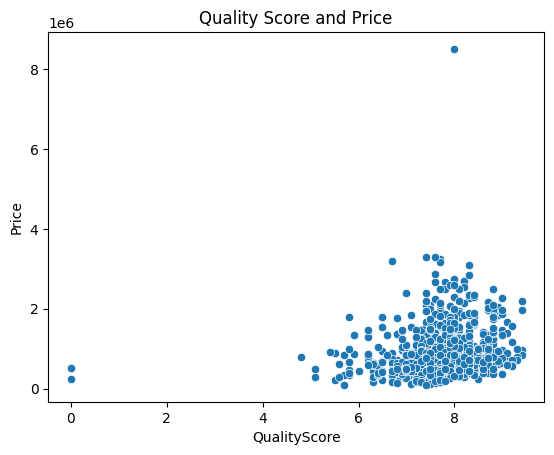

In [89]:
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('Quality Score and Price')

We can see a very high concentration near the quality score 7 and above having much higher price than the cars with quality score less than 7. Therefore, we can assume that cars with quality score 7 and above are more preferred in the used car market and have a good resale value.

## Data Preprocessing Part 2

Dropping column car model beacause, it has too many unique values and it will increase the dimensionality of the dataset.

In [90]:
df.drop('Model', axis = 1, inplace = True)

### Label Encoding

In [91]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
#Label encoding object
le = LabelEncoder()

#label encoding for object type columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


### Outlier Removal

In [92]:
#Using IQRS to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Correlation Matrix Heatmap

<Axes: >

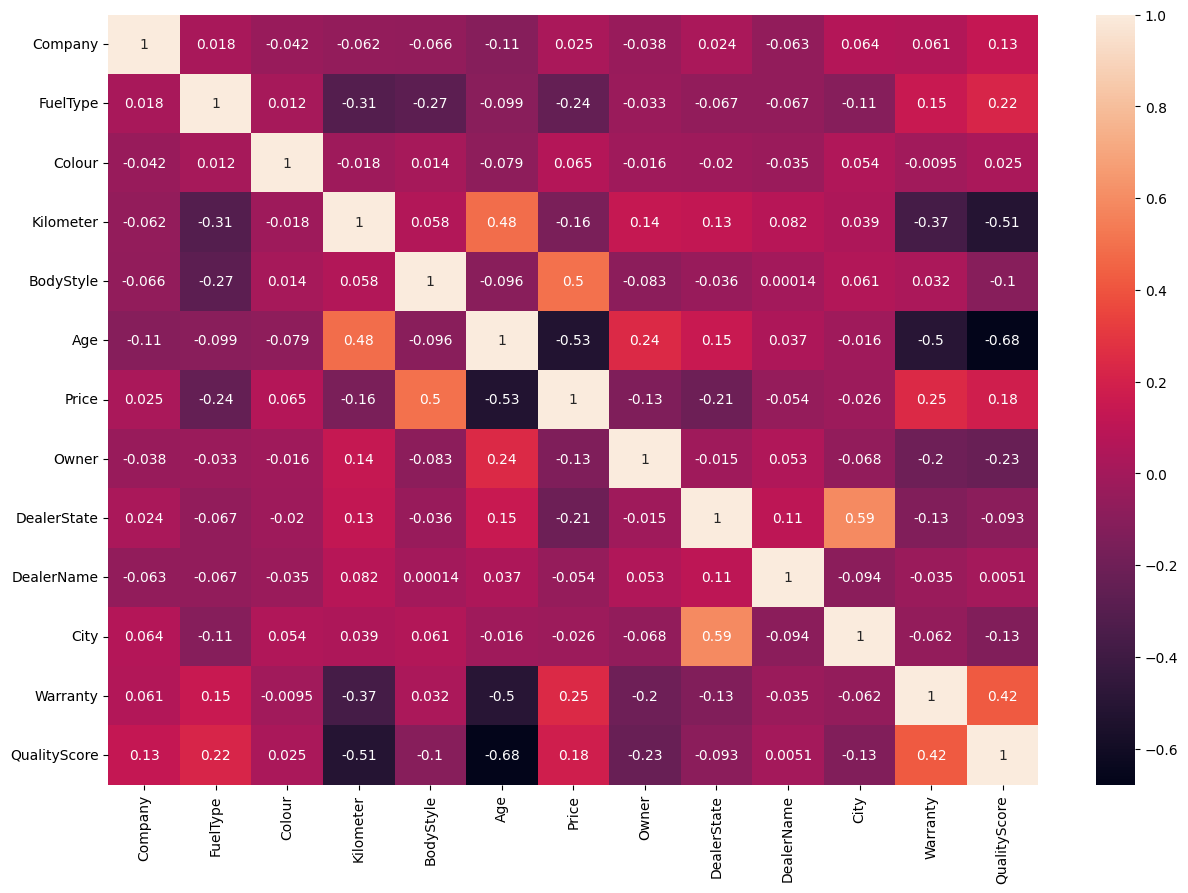

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## Train Test Split

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

## Model Building

I will be using the following regression models:
- Decision Tree Regressor
- Random Forest Regressor
- Ridge Regressor

### Decision Tree Regressor(1)

In [97]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

#### Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [99]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=42)

#Fitting the model
dtr.fit(X_train, y_train)

#Training score
print(dtr.score(X_train, y_train))

0.7445153281346839


In [109]:
#Prediction
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
dtr_pred = dtr.predict(X_test)

# Evaluation metrics
print("Test R² Score:", r2_score(y_test, dtr_pred))
print("MAE:", mean_absolute_error(y_test, dtr_pred))
print("MSE:", mean_squared_error(y_test, dtr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dtr_pred)))


Test R² Score: 0.5660724036960223
MAE: 161645.14749542723
MSE: 46746127636.183586
RMSE: 216208.52813009848


### Random Forest Regressor(2)

In [104]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr = RandomForestRegressor()

#### Hyperparameter Tuning

In [105]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [106]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfr.fit(X_train, y_train)

#Training score
print(rfr.score(X_train, y_train))

0.8781873430425237


In [108]:
#Prediction
# Evaluate on Test Data
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
rfr_pred = rfr.predict(X_test)

# Evaluation metrics
print("Test R² Score:", r2_score(y_test, rfr_pred))
print("MAE:", mean_absolute_error(y_test, rfr_pred))
print("MSE:", mean_squared_error(y_test, rfr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rfr_pred)))

Test R² Score: 0.704701621829243
MAE: 134717.2267038187
MSE: 31811887039.002945
RMSE: 178358.8714894859


##### Interpretation:
R² Score of 0.7047 on test data is good, but since My training R² is higher (0.87), the model is showing some overfitting — which is normal with ensemble models.

MAE ~ ₹134k and RMSE ~ ₹178k indicates the average prediction error in price, depending on the range of your target variable Price

##### So Far Random Forest is performing better than Decision Tree, as expected, since it is an ensemble model that reduces overfitting and variance.

Decision Tree shows lower R² and higher errors, indicating it’s less accurate and likely overfitting the training data more.

### Ridge Regressor(3)

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge()

### Hyperparameter Tuning for Ridge
We usually tune the alpha parameter (regularization strength).



In [111]:
from sklearn.model_selection import GridSearchCV

# Define parameters for GridSearch
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 300]}

grid_ridge = GridSearchCV(estimator=ridge, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit grid search on training data
grid_ridge.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_ridge.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best alpha: {'alpha': 10}


In [112]:
#Trained Ridge Regression with best parameter

In [113]:
best_alpha = grid_ridge.best_params_['alpha']
ridge_best = Ridge(alpha=best_alpha)

# Fit the model
ridge_best.fit(X_train, y_train)

# Training score
print("Train R² Score:", ridge_best.score(X_train, y_train))

Train R² Score: 0.5318933322509363


In [114]:
#Train Ridge regression with Alpha value 

In [115]:
from sklearn.linear_model import Ridge

ridge_best = Ridge(alpha=10)
ridge_best.fit(X_train, y_train)

print("Train R² Score:", ridge_best.score(X_train, y_train))


Train R² Score: 0.5318933322509363


In [116]:
#Predict and evaluate on test data:
ridge_pred = ridge_best.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Test R² Score:", r2_score(y_test, ridge_pred))
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))


Test R² Score: 0.5719614562148903
MAE: 160339.35739182343
MSE: 46111712118.36907
RMSE: 214736.3781904898


#### Interpretation:
Random Forest clearly performs best with the highest R² and lowest error metrics.

Decision Tree and Ridge Regression have similar test R² scores, but Ridge is simpler and linear, while Decision Tree can capture non-linearities.

Ridge has slightly better generalization than Decision Tree (test R² closer to train R²), indicating less overfitting.

## XgBoost(4)

In [117]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 14.4 MB/s eta 0:00:11
   - -------------------------------------- 7.1/150.0 MB 15.6 MB/s eta 0:00:10
   -- ------------------------------------- 10.7/150.0 MB 16.0 MB/s eta 0:00:09
   --- ------------------------------------ 14.7/150.0 MB 16.5 MB/s eta 0:00:09
   ---- ----------------------------------- 18.4/150.0 MB 17.0 MB/s eta 0:00:08
   ----- ---------------------------------- 22.3/150.0 MB 17.0 MB/s eta 0:00:08
   ------- -------------------------------- 26.5/150.0 MB 17.5 MB/s eta 0:00:08
   -------- ------------------------------- 30.1/150.0 MB 17.5 MB/s eta 0:00:07
   -------- ------------------------------- 33.6/150.0 MB 17.6 MB/s eta 0:00:07
   --------- ------------------------------ 36.4/150.0 MB 16.9 MB/s eta 0:00:07
   ---------- ----------------------------- 38.5/150.0 MB 16

In [118]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [149]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Hyperparameter Tuning using GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}


### Train with Best Parameters

In [120]:
best_params = grid_xgb.best_params_

xgb_best = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample']
)

xgb_best.fit(X_train, y_train)

print("Train R² Score:", xgb_best.score(X_train, y_train))


Train R² Score: 0.883107198195416


### Predict and Evaluate on Test Data

In [121]:
xgb_pred = xgb_best.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Test R² Score:", r2_score(y_test, xgb_pred))
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))


Test R² Score: 0.7758101982342731
MAE: 117799.56057960894
MSE: 24151506328.096832
RMSE: 155407.54913483717


##### XGBoost has the best performance across train and test scores and the lowest error metrics.

It generalizes better than Random Forest and Decision Tree.

This is typical as XGBoost handles complex patterns, regularization, and gradient boosting efficiently.

## LightGBM (Fast gradient boosting, often competitive with XGBoost)(5)

In [122]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## hyperparameter tuning

In [123]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgbm = lgb.LGBMRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 70]
}

grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_lgbm.fit(X_train, y_train)

print("Best params:", grid_lgbm.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Gouthum\.conda\envs\myenv\lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 12
[LightGBM] [Info] Start training from score 713589.060309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

### Train with Best Parameters

In [124]:
best_params = grid_lgbm.best_params_

lgbm_best = lgb.LGBMRegressor(
    random_state=42,
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    num_leaves=best_params['num_leaves']
)
lgbm_best.fit(X_train, y_train)

print("Train R² Score:", lgbm_best.score(X_train, y_train))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 12
[LightGBM] [Info] Start training from score 713589.060309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [125]:
# Predict & evaluate on test
lgbm_pred = lgbm_best.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Test R² Score:", r2_score(y_test, lgbm_pred))
print("MAE:", mean_absolute_error(y_test, lgbm_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lgbm_pred)))

Test R² Score: 0.6747787096951183
MAE: 133962.4825797816
RMSE: 187177.51155193447


## SVM Regression (SVR)(6)


## Hyperparameter Tuning

In [126]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_svr.fit(X_train, y_train)

print("Best params:", grid_svr.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale'}


In [127]:
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_svr.fit(X_train, y_train)

print("Best params:", grid_svr.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale'}


## Train with best parameter

In [128]:
best_params = grid_svr.best_params_

svr_best = SVR(
    kernel='rbf',
    C=best_params['C'],
    gamma=best_params['gamma'],
    epsilon=best_params['epsilon']
)

svr_best.fit(X_train, y_train)

print("Train R² Score:", svr_best.score(X_train, y_train))

Train R² Score: -0.04188762475962027


### Why SVR Performed Poorly
SVR:

Is not ideal for large datasets or high-dimensional data.

Is very sensitive to scaling, and even with scaled features, may not generalize well unless tuned very carefully.

Training time and memory usage can be high, leading to suboptimal performance on larger problems like yours.

In [129]:
# Predict & evaluate
svr_pred = svr_best.predict(X_test)

print("Test R² Score:", r2_score(y_test, svr_pred))
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))

Test R² Score: -0.0637036005229803
MAE: 250479.94462381263
RMSE: 338512.3358478775


## KNN Regresor(7)

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Step 1: Define the model
knn = KNeighborsRegressor()

In [131]:
knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Hyerparameter Tuning 

In [132]:
# Step 2: Set up hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [133]:
# Step 3: Grid search
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


### Traing with best Parameter

In [134]:
# Step 4: Best model
best_knn = grid_knn.best_estimator_

In [135]:
best_knn

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [136]:
# Step 5: Fit and evaluate
best_knn.fit(X_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [137]:
print("Train R² Score:", best_knn.score(X_train, y_train))


Train R² Score: 0.11836156210566573


In [140]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 330387.804536279


In [141]:
# Predictions and metrics
y_pred = best_knn.predict(X_test)

print("Test R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Test R² Score: -0.013257078000366018
MAE: 260325.26381129734
MSE: 109156101386.3025


TypeError: got an unexpected keyword argument 'squared'

In [144]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit the model
knn = KNeighborsRegressor(n_neighbors=5)  # you can tune n_neighbors later
knn.fit(X_train, y_train)

# Predict
knn_pred = knn.predict(X_test)


## Model Evaluation

### Distribution Plot

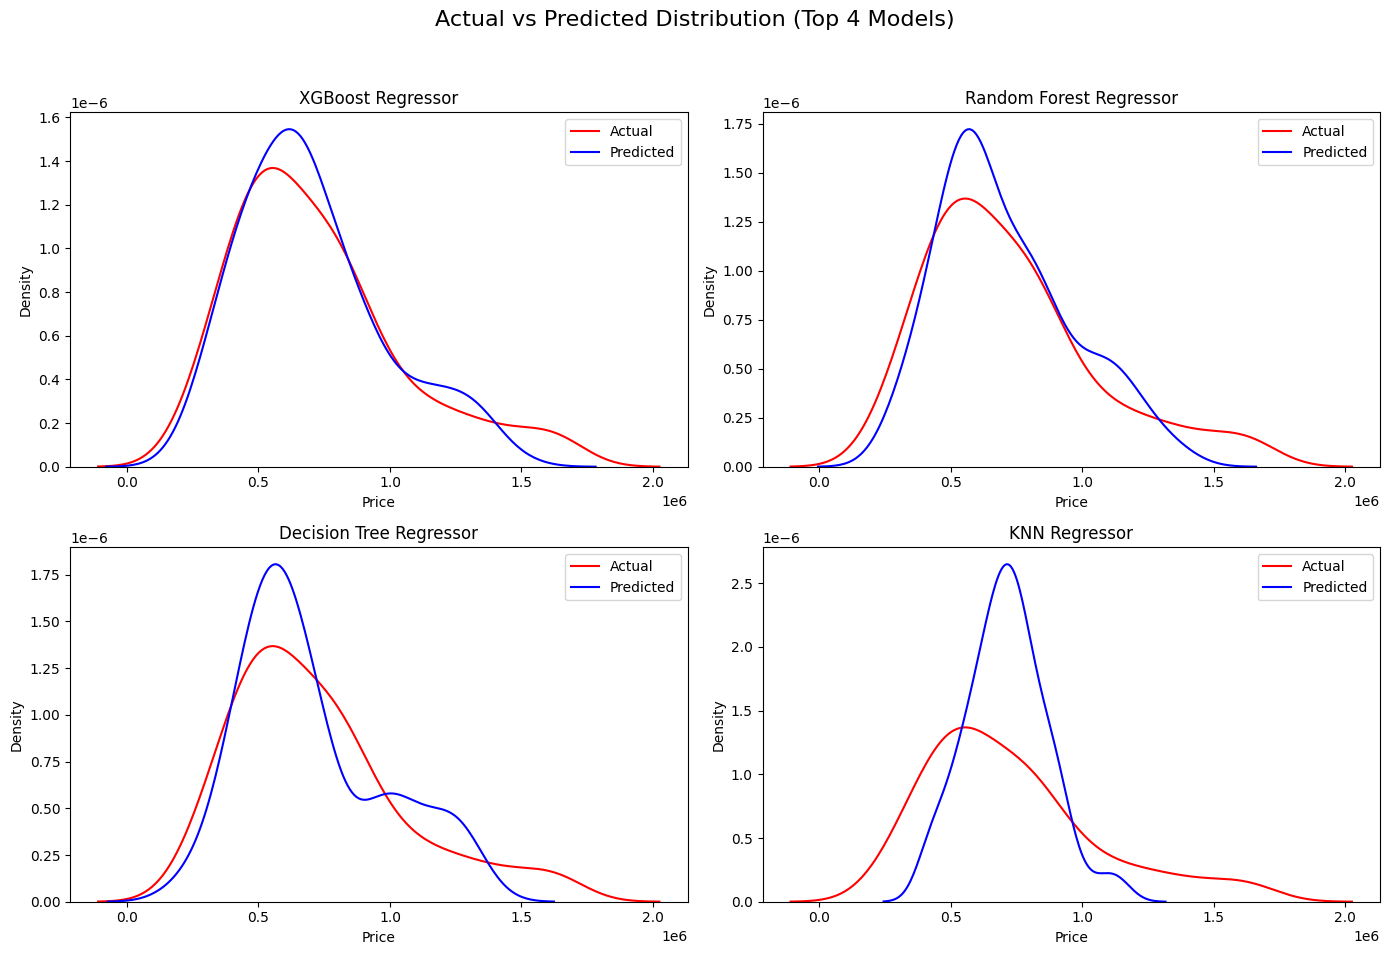

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual top 4 model prediction variables
top_models = {
    "XGBoost Regressor": xgb_pred,
    "Random Forest Regressor": rfr_pred,
    "Decision Tree Regressor": dtr_pred,
    "KNN Regressor": knn_pred
}

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Actual vs Predicted Distribution (Top 4 Models)", fontsize=16)

# Plot each model
for ax, (model_name, preds) in zip(axes.flat, top_models.items()):
    sns.kdeplot(x=y_test, ax=ax, color='r', label='Actual')
    sns.kdeplot(x=preds, ax=ax, color='b', label='Predicted')
    ax.set_title(model_name)
    ax.legend()
    ax.grid(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Model Metrics

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Decision Tree Regressor": dtr_pred,
    "Random Forest Regressor": rfr_pred,
    "XGBoost Regressor": xgb_pred,
    "Ridge Regression": ridge_pred,
    "LightGBM Regressor": lgbm_pred,
    "SVR": svr_pred,
    "KNN Regressor": knn_pred
}

for model_name, preds in models.items():
    print(f"{model_name}:")
    print("  Mean Squared Error (MSE):", mean_squared_error(y_test, preds))
    print("  Mean Absolute Error (MAE):", mean_absolute_error(y_test, preds))
    print("  R2 Score:", r2_score(y_test, preds))
    print("-" * 40)


Decision Tree Regressor:
  Mean Squared Error (MSE): 46746127636.183586
  Mean Absolute Error (MAE): 161645.14749542723
  R2 Score: 0.5660724036960223
----------------------------------------
Random Forest Regressor:
  Mean Squared Error (MSE): 31811887039.002945
  Mean Absolute Error (MAE): 134717.2267038187
  R2 Score: 0.704701621829243
----------------------------------------
XGBoost Regressor:
  Mean Squared Error (MSE): 24151506328.096832
  Mean Absolute Error (MAE): 117799.56057960894
  R2 Score: 0.7758101982342731
----------------------------------------
Ridge Regression:
  Mean Squared Error (MSE): 46111712118.36907
  Mean Absolute Error (MAE): 160339.35739182343
  R2 Score: 0.5719614562148903
----------------------------------------
LightGBM Regressor:
  Mean Squared Error (MSE): 35035420830.77456
  Mean Absolute Error (MAE): 133962.4825797816
  R2 Score: 0.6747787096951183
----------------------------------------
SVR:
  Mean Squared Error (MSE): 114590601521.18622
  Mean Abso

## Feature Importance

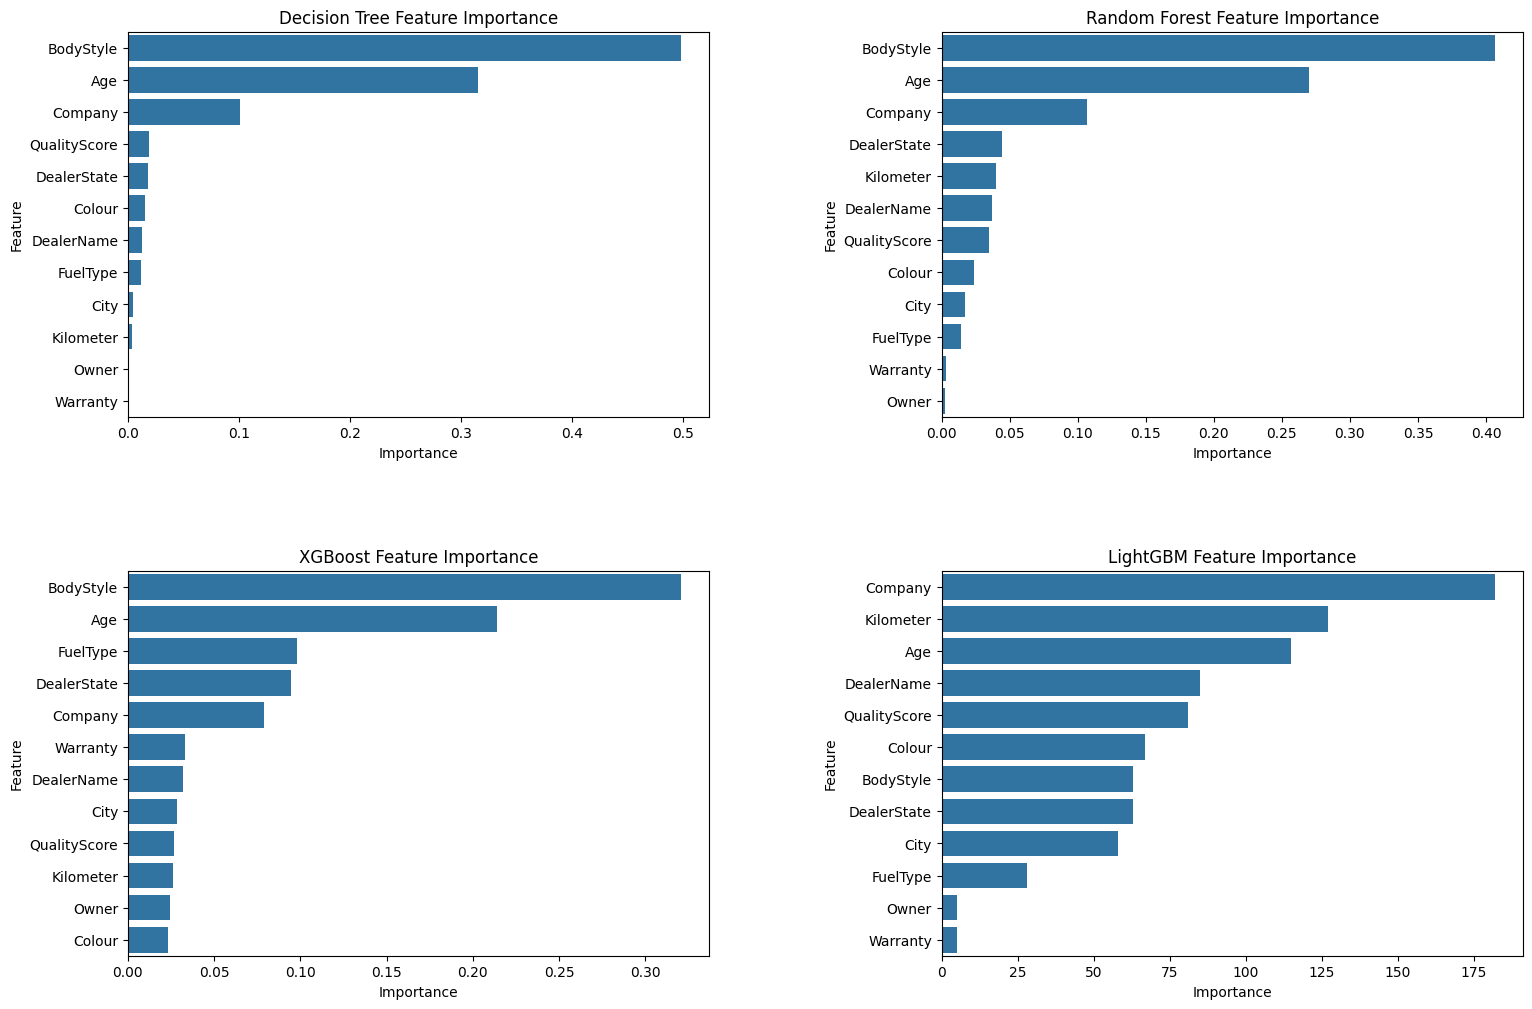

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Decision Tree
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_imp, ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree Feature Importance')

# Random Forest
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfr.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_imp, ax=axes[0, 1])
axes[0, 1].set_title('Random Forest Feature Importance')

# XGBoost
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_best.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_imp, ax=axes[1, 0])
axes[1, 0].set_title('XGBoost Feature Importance')

# LightGBM
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgbm_best.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_imp, ax=axes[1, 1])
axes[1, 1].set_title('LightGBM Feature Importance')

plt.show()


## Save My trained model


In [150]:
import joblib

joblib.dump(xgb_model, r'C:\Users\Gouthum\Downloads\ALL-Ml-Dl-PROJECTS\xgb_model.pkl')


['C:\\Users\\Gouthum\\Downloads\\ALL-Ml-Dl-PROJECTS\\xgb_model.pkl']

In [151]:
# Example: training your model (if not done yet)
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Saving the model
import joblib
joblib.dump(xgb_model, r'C:\Users\Gouthum\Downloads\ALL-Ml-Dl-PROJECTS\xgb_model.pkl')


['C:\\Users\\Gouthum\\Downloads\\ALL-Ml-Dl-PROJECTS\\xgb_model.pkl']

# StreamLit App

## Working 

In [163]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load(r'C:\Users\Gouthum\Downloads\ALL-Ml-Dl-PROJECTS\xgb_model.pkl')

st.title("🚗 Used Car Price Prediction")

# Create two columns to reduce scrolling
col1, col2 = st.columns(2)

with col1:
    company = st.selectbox("Company", ['Maruti Suzuki', 'Hyundai', 'Honda', 'BMW', 'Mercedes Benz', 'Other'])
    colour = st.selectbox("Colour", ['White', 'Grey', 'Black', 'Silver', 'Other'])
    age = st.number_input("Age (years)", 0, 30, 3)
    dealer_state = st.selectbox("DealerState", ['Delhi', 'Maharashtra', 'Rajasthan', 'Other'])
    city = st.selectbox("City", ['Delhi', 'Mumbai', 'Bangalore', 'Other'])
    warranty = st.selectbox("Warranty", ['Yes', 'No'])
    quality_score = st.number_input("QualityScore", 0, 10, 7)

with col2:
    fuel_type = st.selectbox("FuelType", ['Petrol', 'Diesel', 'CNG', 'Electric'])
    kilometer = st.number_input("Kilometer", 0, 500000, 50000)
    bodystyle = st.selectbox("BodyStyle", ['SUV', 'Sedan', 'HatchBack', 'MPV', 'Coupe', 'Convertible'])
    owner = st.selectbox("Owner", ['1st Owner', '2nd Owner', '3rd Owner', '4th & Above Owner'])
    dealer_name = st.selectbox("DealerName", ['Car Estate', 'Star Auto India', 'Car Choice', 'Other'])

# Encoding dictionaries
company_map = {'Maruti Suzuki':0, 'Hyundai':1, 'Honda':2, 'BMW':3, 'Mercedes Benz':4, 'Other':5}
fuel_type_map = {'Petrol':0, 'Diesel':1, 'CNG':2, 'Electric':3}
colour_map = {'White':0, 'Grey':1, 'Black':2, 'Silver':3, 'Other':4}
bodystyle_map = {'SUV':0, 'Sedan':1, 'HatchBack':2, 'MPV':3, 'Coupe':4, 'Convertible':5}
owner_map = {'1st Owner':0, '2nd Owner':1, '3rd Owner':2, '4th & Above Owner':3}
dealer_state_map = {'Delhi':0, 'Maharashtra':1, 'Rajasthan':2, 'Other':3}
dealer_name_map = {'Car Estate':0, 'Star Auto India':1, 'Car Choice':2, 'Other':3}
city_map = {'Delhi':0, 'Mumbai':1, 'Bangalore':2, 'Other':3}
warranty_map = {'Yes':1, 'No':0}

# Prepare input data
input_dict = {
    'Company': company_map[company],
    'FuelType': fuel_type_map[fuel_type],
    'Colour': colour_map[colour],
    'Kilometer': kilometer,
    'BodyStyle': bodystyle_map[bodystyle],
    'Age': age,
    'Owner': owner_map[owner],
    'DealerState': dealer_state_map[dealer_state],
    'DealerName': dealer_name_map[dealer_name],
    'City': city_map[city],
    'Warranty': warranty_map[warranty],
    'QualityScore': quality_score
}

input_df = pd.DataFrame([input_dict])

# Predict button with animation
if st.button("Predict Price"):
    prediction = model.predict(input_df)
    st.success(f"Estimated Used Car Price: ₹{prediction[0]:,.2f}")
    st.balloons()


2025-07-29 06:54:42.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:54:42.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Conclusion

Conclusion
From the exploratory data analysis of the used car market, two key insights emerged: demand and price dynamics. There is notably higher demand for low-priced used cars compared to expensive ones, indicating customers’ preference for budget-friendly options. However, when examining car brands, luxury companies like MG, Mercedes Benz, BMW, Volvo, and KIA have the highest prices, while brands such as Maruti Suzuki, Hyundai, Honda, Mahindra, and Tata enjoy greater demand. This suggests that customers prefer purchasing new luxury cars rather than used ones from premium brands.

Most cars run on petrol or diesel, with diesel cars generally commanding slightly higher prices. Popular car colors like white, grey, silver, and black are in high demand, whereas exotic colors such as burgundy, riviera red, dark blue, and black magic tend to have higher prices. Regarding mileage, most cars have odometer readings below 10,000 km, and lower mileage correlates with higher prices.

Body styles like Hatchback, SUV, and Sedan are most preferred by customers, while MPV, SUV, and Sedan are among the most expensive. The age of the car significantly affects resale value; as the car gets older, its price decreases. Cars less than 5 years old tend to have higher prices and greater preference. Additionally, car prices vary by location, with Delhi, Maharashtra, and Rajasthan being the states with the highest prices. Dealers such as Car Estate, Star Auto India, and Car Choice also offer cars at higher price points.

Customers typically prefer cars with a 1st owner type, which results in both higher demand and price. Cars that come with a warranty provide assurance to buyers, often leading to slightly higher prices. Finally, the quality score plays an important role, where higher quality scores correspond to higher prices.

Regarding machine learning models, I experimented with Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor to predict car prices. Among these, the XGBoost model performed the best, achieving higher accuracy and better evaluation metrics. Feature importance analysis shows that car age, body style, and company are the most influential features affecting car price.

In [156]:
# Print feature names the model expects
print(model.get_booster().feature_names)


['Company', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle', 'Age', 'Owner', 'DealerState', 'DealerName', 'City', 'Warranty', 'QualityScore']


In [157]:
print(X_train.columns.tolist())


['Company', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle', 'Age', 'Owner', 'DealerState', 'DealerName', 'City', 'Warranty', 'QualityScore']


In [158]:
print("Number of features expected by model:", len(model.get_booster().feature_names))

importances = model.feature_importances_
print("Feature importances:", importances)


Number of features expected by model: 12
Feature importances: [0.06220335 0.03909497 0.01428663 0.01455708 0.51046866 0.1956001
 0.02233552 0.05586154 0.02393484 0.0238087  0.01302861 0.02482006]
